# CS418 Project1 - Exploratory Data Analysis

Find the Project Description [here](./Project_Description.pdf).

This project is done as part of **CS418 - Introduction to DataScience** at UIC.


In [43]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import plotly.figure_factory as ff

### Load Dataset

In [44]:
election_train_raw = pd.read_csv('data/election_train.csv')
demographics_train = pd.read_csv('data/demographics_train.csv')

In [45]:
print(election_train_raw.shape)
election_train_raw.head()

(2405, 6)


,Year,State,County,Office,Party,Votes
0,2018,AZ,Apache County,US Senator,Democratic,16298
1,2018,AZ,Apache County,US Senator,Republican,7810
2,2018,AZ,Cochise County,US Senator,Democratic,17383
3,2018,AZ,Cochise County,US Senator,Republican,26929
4,2018,AZ,Coconino County,US Senator,Democratic,34240


In [46]:
print(demographics_train.shape)
demographics_train.head()

(1216, 17)


,State,County,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,Wisconsin,La Crosse,55063,117538,0,90.537528,1.214075,1.724549,2.976059,51.171536,43.241335,14.702479,51477,4.796952,5.474767,67.529757,16.827753
1,Virginia,Alleghany,51005,15919,12705,91.940449,5.207614,1.432251,1.300333,51.077329,31.660280,23.902255,45538,4.560986,15.537543,83.711604,52.393846
2,Indiana,Fountain,18045,16741,12750,95.705155,0.400215,2.359477,1.547100,49.770026,35.899887,18.941521,45924,7.978789,12.032155,85.538940,65.951276
3,Ohio,Geauga,39055,94020,0,95.837056,1.256116,1.294405,2.578175,50.678579,36.281642,18.028079,74165,4.036902,8.928599,62.730824,63.968990
4,Wisconsin,Jackson,55053,20566,15835,86.662453,1.983857,3.082758,1.376058,46.649810,36.292911,17.587280,49608,5.569698,11.792912,86.129256,72.238251


**1. (5 pts.) Reshape dataset election_train from long format to wide format. Hint: the reshaped dataset should contain 1205 rows and 6 columns.**

In [47]:
election_train = election_train_raw.pivot(index=['Year','State','County','Office'], columns='Party', values='Votes').reset_index()
print(election_train.shape)
election_train

(1205, 6)


Party,Year,State,County,Office,Democratic,Republican
0,2018,AZ,Apache County,US Senator,16298.0,7810.0
1,2018,AZ,Cochise County,US Senator,17383.0,26929.0
2,2018,AZ,Coconino County,US Senator,34240.0,19249.0
3,2018,AZ,Gila County,US Senator,7643.0,12180.0
4,2018,AZ,Graham County,US Senator,3368.0,6870.0
...,...,...,...,...,...,...
1200,2018,WY,Platte County,US Senator,801.0,2850.0
1201,2018,WY,Sublette County,US Senator,668.0,2653.0
1202,2018,WY,Sweetwater County,US Senator,3943.0,8577.0
1203,2018,WY,Uinta County,US Senator,1371.0,4713.0


**2. Merge reshaped dataset election_train with dataset demographics_train. Make sure that you address all inconsistencies in the names of the states and the counties before merging. Hint: the merged dataset should contain 1200 rows.**

In [48]:
state_abbr = {'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'MP': 'Northern Mariana Islands',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PW': 'Palau',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'PR': 'Puerto Rico',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VA': 'Virginia',
 'WA': 'Washington',
 'DC': 'Washington, DC',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming',
 'VI': 'Virgin Islands'}

In [49]:
election_train['State'] = election_train['State'].map(state_abbr)

In [50]:
def standardize_county_name(county):
    county = county.replace('County', '').strip()
    return county.lower()
    
election_train['County'] = election_train['County'].apply(standardize_county_name)
demographics_train['County'] = demographics_train['County'].apply(standardize_county_name)

In [51]:
election_dataset = election_train.merge(demographics_train, how='inner', on=['State', 'County'])
election_dataset.shape

(1200, 21)

**3. (5 pts.) Explore the merged dataset. How many variables does the dataset have? What is the type of these variables? Are there any irrelevant or redundant variables? If so, how will you deal with these variables?**

In [52]:
print('Shape: ', election_dataset.shape)
election_dataset.info()

Shape:  (1200, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   1200 non-null   int64  
 1   State                                  1200 non-null   object 
 2   County                                 1200 non-null   object 
 3   Office                                 1200 non-null   object 
 4   Democratic                             1197 non-null   float64
 5   Republican                             1198 non-null   float64
 6   FIPS                                   1200 non-null   int64  
 7   Total Population                       1200 non-null   int64  
 8   Citizen Voting-Age Population          1200 non-null   int64  
 9   Percent White, not Hispanic or Latino  1200 non-null   float64
 10  Percent Black, not Hispanic or Latino  1200 non-null 

In [53]:
election_dataset.describe()

,Year,Democratic,Republican,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
count,1200.0,1197.000000,1198.000000,1200.000000,1.200000e+03,1.200000e+03,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,2018.0,25096.309106,20436.841402,38315.355000,1.208766e+05,3.226592e+04,79.099685,5.552660,10.556249,5.072053,49.825231,36.753853,18.105368,50098.516667,6.540929,13.448139,78.629091,55.950082
std,0.0,72593.640184,45218.050721,13001.996705,3.183773e+05,1.247969e+05,19.782542,9.274481,15.840002,6.054644,2.394356,5.618738,4.758807,12291.769508,2.776238,6.439020,9.191006,32.145514
min,2018.0,6.000000,46.000000,4001.000000,7.600000e+01,0.000000e+00,2.776702,0.000000,0.000000,0.000000,21.513413,11.842105,6.653188,21190.000000,0.000000,2.134454,26.335440,0.000000
25%,2018.0,1427.000000,2667.500000,27146.500000,1.208350e+04,0.000000e+00,70.168347,0.538615,1.819812,1.468692,49.352173,33.298306,15.052983,42081.500000,4.710440,8.916211,74.432551,29.744143
50%,2018.0,4213.000000,6691.000000,39140.000000,3.264300e+04,0.000000e+00,86.801005,1.605082,3.884901,2.869445,50.310516,36.427490,17.704921,48391.000000,6.417206,11.841157,81.013166,56.201291
75%,2018.0,14206.000000,16740.500000,48416.000000,8.582300e+04,1.893250e+04,93.876656,6.426589,11.075522,6.319101,50.971969,39.451774,20.501641,54958.250000,8.118306,16.811195,85.004467,83.377538
max,2018.0,881802.000000,672505.000000,56043.000000,4.434257e+06,2.723565e+06,99.627329,63.953279,95.479801,52.229868,56.418468,67.367823,37.622759,125672.000000,18.771186,49.673777,97.014925,100.000000


**Merged Dataset Summary:**
- **Number of variables**: 21
- **Types of data:** float object: 13, int object: 5, string object: 3
- **Irrelevant or redundant variables?**
    Office and Year are the irrelevant or redundant variables

- **Dealing with Irrelevant/Redundant Variables**:
    These variables can be removed from the dataframe since they are of no signifant importance for further analysis


In [54]:
election_dataset=election_dataset.drop(columns=['Office','Year'])

**4. (10 pts.) Search the merged dataset for missing values. Are there any missing values? If so, how will you deal with these values?**

In [55]:
election_dataset[pd.isna(election_dataset['Democratic'])]

,State,County,Democratic,Republican,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
425,Nebraska,lancaster,NaN,49449.0,31109,301707,0,82.659667,3.783472,6.531834,7.523856,49.891782,45.457016,12.175057,53730,4.372984,6.636272,62.697684,8.253126
714,Tennessee,meigs,NaN,2694.0,47121,11804,0,94.713656,1.330058,1.465605,1.067435,50.626906,33.361572,19.662826,35209,12.544170,21.141176,91.176471,100.000000
865,Texas,menard,NaN,632.0,48327,2163,0,56.310680,1.248266,39.389736,4.299584,46.833102,36.430883,22.468793,37917,8.360836,21.113990,84.909326,100.000000


In [56]:
election_dataset[pd.isna(election_dataset['Republican'])]

,State,County,Democratic,Republican,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
750,Texas,bee,2811.0,NaN,48025,32706,0,32.660674,7.989360,57.909864,4.344769,39.579894,40.448236,11.514707,44005,6.065048,28.602944,91.094503,42.977308
1114,Wisconsin,lafayette,3592.0,NaN,55065,16793,0,94.771631,0.339427,3.507414,2.286667,49.199071,37.688323,16.709343,53038,2.998885,10.123457,82.336861,100.000000


In [57]:
election_dataset[election_dataset['Citizen Voting-Age Population']==0]

,State,County,Democratic,Republican,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,Arizona,apache,16298.0,7810.0,4001,72346,0,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076
3,Arizona,gila,7643.0,12180.0,4007,53179,0,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000
4,Arizona,graham,3368.0,6870.0,4009,37529,0,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399
7,Arizona,mohave,19214.0,50209.0,4015,203629,0,78.252606,0.951731,15.708470,6.969047,49.676618,30.485835,26.858650,39856,11.680953,16.145850,88.121178,22.963644
9,Arizona,pima,221242.0,160550.0,4019,1003338,0,53.271579,3.199719,36.105978,12.903428,50.807405,40.087388,17.801778,46764,9.214114,12.252238,69.199391,7.523491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,Wyoming,converse,834.0,3959.0,56009,14223,0,88.849047,0.007031,7.691767,2.706883,49.933207,38.515081,13.668003,66737,5.282284,9.758393,84.468152,55.360370
1190,Wyoming,goshen,1020.0,3658.0,56015,13546,0,86.409272,0.147645,10.519711,2.724051,47.091392,35.914661,20.389783,44883,6.918819,8.390574,77.036880,45.995924
1192,Wyoming,lincoln,1152.0,5846.0,56023,18543,0,92.600982,0.210322,4.416761,2.151755,48.773122,38.715418,14.382786,64579,5.618095,6.949996,79.631291,82.729482
1196,Wyoming,sublette,668.0,2653.0,56035,10032,0,91.646730,0.000000,7.814992,2.053429,46.949761,36.393541,13.337321,76004,2.786971,4.658830,75.645069,100.000000


**Missing values information** :
There 3 rows with missing values for 'Democratic' votes and 2 rows with missing values for 'Republican' votes.       Additionally, 680 rows are present with 'Citizen Voting-Age Population' as 0. These can be considered as a missing value.

**Dealing with Missing values**: The total 5 rows with missing votes for one party should be deleted as it can influence the result but both the party votes are unknown. Since there are 680 rows missing in the 'Citizen Voting-Age Population', it can be best resolved by deleting the feature from the data-frame

In [58]:
election_dataset = election_dataset.dropna().drop(columns=['Citizen Voting-Age Population'])
election_dataset['Democratic'] = election_dataset['Democratic'].astype(int)
election_dataset['Republican'] = election_dataset['Republican'].astype(int)
election_dataset.sample(3)

,State,County,Democratic,Republican,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
925,Texas,yoakum,335,1558,48501,8316,34.271284,0.000000,63.552189,25.637326,49.158249,46.284271,11.423761,56655,9.136546,28.571429,82.183908,37.327072
445,Nebraska,rock,79,569,31149,1407,95.735608,0.284293,0.710732,0.639659,51.101635,29.708600,25.870647,48750,1.633166,7.545368,82.521490,100.000000
190,Michigan,cass,7079,11811,26027,51795,86.660875,4.757216,3.475239,1.434501,49.682402,34.153876,19.169804,47991,8.939509,12.194188,82.625472,71.181611


**5. (5 pts.) Create a new variable named “Party” that labels each county as Democratic or
Republican. This new variable should be equal to 1 if there were more votes cast for the
Democratic party than the Republican party in that county and it should be equal to 0
otherwise**

In [59]:
election_dataset['Party'] = (election_dataset['Democratic'] > election_dataset['Republican']).astype(int)
election_dataset.sample(3)

,State,County,Democratic,Republican,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Party
207,Michigan,keweenaw,598,704,26083,2195,97.676538,0.637813,1.093394,1.230068,48.154897,25.193622,31.116173,41472,6.644880,5.614035,75.146199,100.0,0
334,Montana,mineral,785,1181,30061,4223,97.276817,0.047360,1.326072,1.894388,48.969927,27.989581,26.710869,37143,6.853397,12.632254,87.335685,100.0,0
494,Nevada,esmeralda,52,280,32009,1069,84.845650,0.000000,12.722170,10.664172,53.227315,34.985968,26.473340,43125,11.392405,10.828025,83.184713,100.0,0


In [62]:
# Save the cleaned data as a CSV file for potential future use
election_dataset.to_csv('data/clean_data.csv', index=False)

**6. (10 pts.) Compute the mean median household income for Democratic counties and
Republican counties. Which one is higher? Perform a hypothesis test to determine
whether this difference is statistically significant at the 𝜶 = 𝟎. 𝟎𝟓 significance level. What
is the result of the test? What conclusion do you make from this result?**

In [20]:
mean_income_democratic = election_dataset[election_dataset['Party'] == 1]['Median Household Income'].mean()
mean_income_republican = election_dataset[election_dataset['Party'] == 0]['Median Household Income'].mean()
print("Mean 'Median Household income' of Democratic County's:", mean_income_democratic)
print("Mean 'Median Household income' of Republican County's:", mean_income_republican)

Mean 'Median Household income' of Democratic County's: 53798.732307692306
Mean 'Median Household income' of Republican County's: 48746.81954022989


**Mean 'Median Household Income' of Democratic Counties are higher than Republican Counties.**

**Null Hypotheses:** Median Household Income of Democratic counties is equal to Republican counties.(*μd==μr*)<br />
**Alternative Hypotheses:** Median Household Income of Democratic counties are higher than Republican counties. (*μd>μr*) <br/><br/>
We do a t-test on the data since population standard deviation is unknown.<br/>
We do a right tailed t-test since the alternative hypothesis is μd>μr

In [21]:
(t_test_statistic,p_value) = st.ttest_ind(election_dataset[election_dataset['Party'] == 1]['Median Household Income'],
                                          election_dataset[election_dataset['Party'] == 0]['Median Household Income'], 
                                          equal_var=False)

In [22]:
#Since the function return two sided test result, convert it into right tailed test.
p_value=p_value/2
print('T-Test Statistic: ', t_test_statistic)
print('p value: ', p_value)

T-Test Statistic:  5.479141589767387
p value:  3.574718681591299e-08


*The p value for the Null hypothesis is 3.57*10^-8 which is way lesser than the significance level 0.05.<br/>
  Hence, we reject the null hypothesis and there is sufficient evidence to conclude that Median Household Income of Democratic counties may be higher than that of the republican ones*

 **7. (10 pts.) Compute the mean population for Democratic counties and Republican counties. Which one is higher? Perform a hypothesis test to determine whether this difference is statistically significant at the 𝜶=𝟎.𝟎𝟓 significance level. What is the result of the test? What conclusion do you make from this result?**

In [23]:
mean_population_democratic = election_dataset[election_dataset['Party'] == 1]['Total Population'].mean()
mean_population_republican = election_dataset[election_dataset['Party'] == 0]['Total Population'].mean()
print("Mean 'Total Population' of Democratic County's:", mean_population_democratic)
print("Mean 'Total Population' of Republican County's:", mean_population_republican)

Mean 'Total Population' of Democratic County's: 300998.3169230769
Mean 'Total Population' of Republican County's: 53864.6724137931


**Mean 'Total Population' of Democratic Counties are higher than Republican Counties.**

**Null Hypotheses:** Mean population of Democratic counties is equal to Republican counties.(*μd==μr*)<br />
**Alternative Hypotheses:** Mean population of Democratic counties are higher than Republican counties. (*μd>μr*) <br/><br/>
We do a t-test on the data since population standard deviation is unknown.<br/>
We do a right tailed t-test since the alternative hypothesis is μd>μr

In [24]:
(t_test_statistic,p_value) = st.ttest_ind(election_dataset[election_dataset['Party'] == 1]['Total Population'],
                                          election_dataset[election_dataset['Party'] == 0]['Total Population'], 
                                          equal_var=False)

In [25]:
#Since the function return two sided test result, convert it into right tailed test.
p_value=p_value/2
print('T-Test Statistic: ', t_test_statistic)
print('p value: ', p_value)

T-Test Statistic:  8.004638577960957
p value:  1.0239358801486512e-14


*The p value for the Null hypothesis is 1.024*10^-14 which is way lesser than the significance level 0.05.<br/>
  Hence, we reject the null hypothesis and there is sufficient evidence to conclude that mean population of Democratic counties __maybe__ higher than that of the republican ones*

**8. (20 pts.) Compare Democratic counties and Republican counties in terms of age, gender, race and ethnicity, and education by computing descriptive statistics and creating plots to visualize the results. What conclusions do you make for each variable from the descriptive statistics and the plots?**

In [26]:
democratic_counties = election_dataset[election_dataset['Party'] == 1]
republican_counties = election_dataset[election_dataset['Party'] == 0]

**Gender:**

In [27]:
election_dataset[['Percent Female','Party']].groupby(by=['Party']).describe().T

Party                          0           1
Percent Female count  870.000000  325.000000
               mean    49.630898   50.385433
               std      2.429013    2.149359
               min     21.513413   34.245291
               25%     49.222905   49.854280
               50%     50.176792   50.653830
               75%     50.829770   51.492075
               max     55.885023   56.418468

**Age:**

- Columns 'Percent Age 29 and Under','Percent Age 65 and Older' are available in the dataset. 
- Column 'Percent Age between 30 and 64' can be computed, which can be very helpful in visualizing the distribution.

In [28]:
age_columns = ['Percent Age 29 and Under', 'Percent Age from 30 to 64', 'Percent Age 65 and Older']
election_dataset[age_columns[1]] = 100 - (election_dataset[age_columns[0]] + election_dataset[age_columns[2]])

In [29]:
election_dataset.groupby(by=['Party'])[age_columns].describe().T

Party                                     0           1
Percent Age 29 and Under  count  870.000000  325.000000
                          mean    36.005719   38.726959
                          std      5.181522    6.252786
                          min     11.842105   23.156452
                          25%     32.983652   34.488444
                          50%     35.846532   38.074151
                          75%     38.539787   42.161162
                          max     58.749116   67.367823
Percent Age from 30 to 64 count  870.000000  325.000000
                          mean    45.166015   45.078214
                          std      2.910264    3.907598
                          min     27.421759   18.433769
                          25%     43.522522   43.741937
                          50%     45.553295   45.817819
                          75%     46.975771   47.448269
                          max     63.157895   57.478906
Percent Age 65 and Older  count  870.000000  325.000000
                          mean    18.828267   16.194826
                          std      4.733155    4.282422
                          min      6.954387    6.653188
                          25%     15.784982   13.106233
                          50%     18.377896   15.698087
                          75%     21.112847   18.806426
                          max     37.622759   31.642106

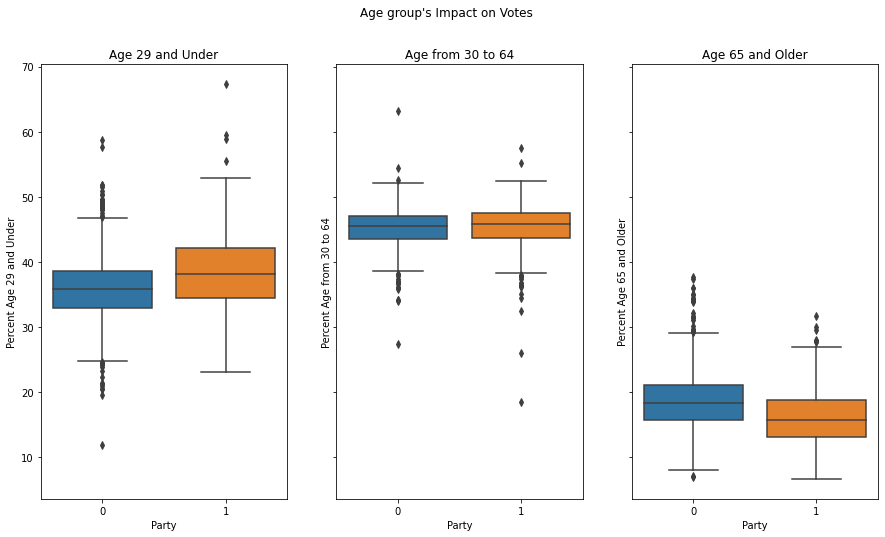

In [30]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 8))
fig.suptitle('Age group\'s Impact on Votes')

for index, y_col in enumerate(age_columns):
    sns.boxplot(ax=axes[index], x="Party", y=y_col, data=election_dataset)
    axes[index].set_title(y_col.replace('Percent ',''))    

**Race and Ethinicity:**

In [31]:
ethnicity_columns = ['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino']
election_dataset.groupby(by=['Party'])[ethnicity_columns].describe().T

Party                                                 0           1
Percent White, not Hispanic or Latino count  870.000000  325.000000
                                      mean    82.656646   69.683766
                                      std     16.056122   24.981502
                                      min     18.758977    2.776702
                                      25%     75.016397   53.271579
                                      50%     89.434849   77.786090
                                      75%     94.466596   90.300749
                                      max     99.627329   98.063495
Percent Black, not Hispanic or Latino count  870.000000  325.000000
                                      mean     4.189241    9.242649
                                      std      6.721695   13.351340
                                      min      0.000000    0.000000
                                      25%      0.460419    0.839103
                                      50%      1.318311    3.485992
                                      75%      4.753831   11.058843
                                      max     41.563041   63.953279
Percent Hispanic or Latino            count  870.000000  325.000000
                                      mean     9.733094   12.587391
                                      std     14.049576   19.575030
                                      min      0.000000    0.193349
                                      25%      1.704539    2.531017
                                      50%      3.427435    5.039747
                                      75%     10.709696   11.857116
                                      max     78.397012   95.479801

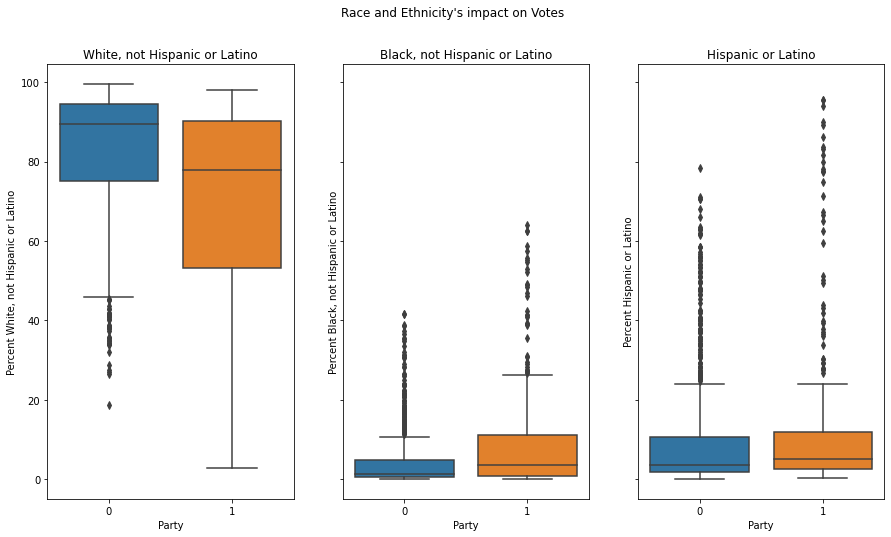

In [32]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 8))
fig.suptitle('Race and Ethnicity\'s impact on Votes')

for index, y_col in enumerate(ethnicity_columns):
    sns.boxplot(ax=axes[index], x="Party", y=y_col, data=election_dataset)
    axes[index].set_title(y_col.replace('Percent ',''))

**Education:**
- Columns 'Percent Less than High School Degree', 'Percent Less than Bachelor's Degree' are related to Education in the dataset.
- 'Percent Higher than Bachelor's Degree' can be computed using these two values.
- New column is added to visualize and understand better how education level affects the voting pattern

In [42]:
education_columns = ['Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree', 'Bacherlor\'s Degree and higher']
election_dataset[education_columns[-1]] = 100 - election_dataset[education_columns[1]]

In [34]:
election_dataset.groupby(by=['Party'])[education_columns].describe().T

Party                                                  0           1
Percent Less than High School Degree   count  870.000000  325.000000
                                       mean    14.009112   11.883760
                                       std      6.303126    6.505613
                                       min      2.134454    3.215803
                                       25%      9.662491    7.893714
                                       50%     12.572435   10.370080
                                       75%     17.447168   13.637059
                                       max     47.812773   49.673777
Percent Less than Bachelor's Degree    count  870.000000  325.000000
                                       mean    81.095427   71.968225
                                       std      6.815537   11.192404
                                       min     43.419470   26.335440
                                       25%     78.108424   65.711800
                                       50%     82.406700   72.736143
                                       75%     85.546272   79.903653
                                       max     97.014925   94.849957
Percent Higher than Bacherlor's Degree count  870.000000  325.000000
                                       mean    18.904573   28.031775
                                       std      6.815537   11.192404
                                       min      2.985075    5.150043
                                       25%     14.453728   20.096347
                                       50%     17.593300   27.263857
                                       75%     21.891576   34.288200
                                       max     56.580530   73.664560

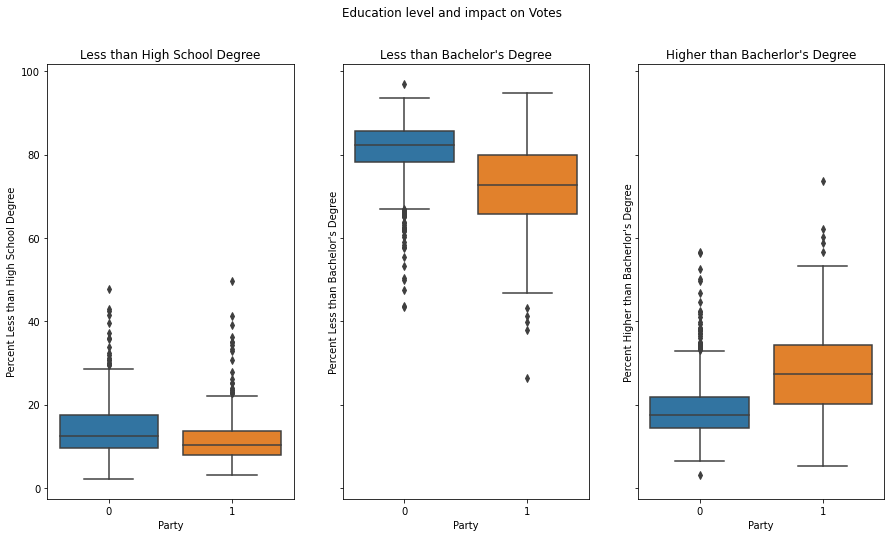

In [35]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 8))
fig.suptitle('Education level and impact on Votes')

for index, y_col in enumerate(education_columns):
    sns.boxplot(ax=axes[index], x="Party", y=y_col, data=election_dataset)
    axes[index].set_title(y_col.replace('Percent ',''))

**Gender and Voting Patters:**
- We have 'Percent Female' column in the dataset.
- 'Non-Females' (Including Male and Transgender voters) can be computed from the female voters data for visualization purposes.

In [36]:
election_dataset['Percent Non-Females'] = 100 - election_dataset['Percent Female']
gender_columns = ['Percent Female', 'Percent Non-Females']

In [37]:
election_dataset.groupby(by=['Party'])[gender_columns].describe().T

Party                               0           1
Percent Female      count  870.000000  325.000000
                    mean    49.630898   50.385433
                    std      2.429013    2.149359
                    min     21.513413   34.245291
                    25%     49.222905   49.854280
                    50%     50.176792   50.653830
                    75%     50.829770   51.492075
                    max     55.885023   56.418468
Percent Non-Females count  870.000000  325.000000
                    mean    50.369102   49.614567
                    std      2.429013    2.149359
                    min     44.114977   43.581532
                    25%     49.170230   48.507925
                    50%     49.823208   49.346170
                    75%     50.777095   50.145720
                    max     78.486587   65.754709

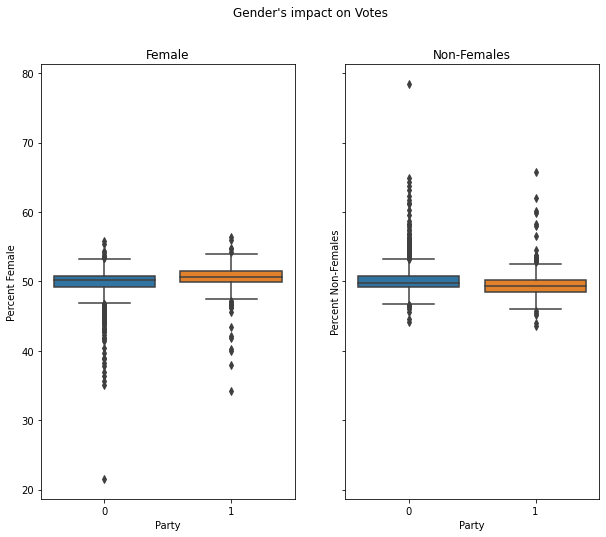

In [38]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 8))
fig.suptitle('Gender\'s impact on Votes')

for index, y_col in enumerate(gender_columns):
    sns.boxplot(ax=axes[index], x="Party", y=y_col, data=election_dataset)
    axes[index].set_title(y_col.replace('Percent ',''))

**Removing Redundant Computed Values:**

In [39]:
election_dataset.drop(columns=[age_columns[1]])
election_dataset.drop(columns=[education_columns[-1]])
election_dataset.drop(columns=[gender_columns[-1]])

,State,County,Democratic,Republican,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,...,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Party,Percent Age from 30 to 64,Percent Higher than Bacherlor's Degree
0,Arizona,apache,16298,7810,4001,72346,18.571863,0.486551,5.947806,1.719515,...,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,1,40.823266,11.058937
1,Arizona,cochise,17383,26929,4003,128177,56.299492,3.714395,34.403208,11.458374,...,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,0,42.341450,23.162945
2,Arizona,coconino,34240,19249,4005,138064,54.619597,1.342855,13.711033,4.825298,...,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,1,40.179917,34.208561
3,Arizona,gila,7643,12180,4007,53179,63.222325,0.552850,18.548675,4.249798,...,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,0,41.364072,17.737376
4,Arizona,graham,3368,6870,4009,37529,51.461536,1.811932,32.097844,4.385942,...,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,0,41.290735,13.324056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Wyoming,platte,801,2850,56031,8740,89.359268,0.057208,7.814645,2.780320,...,32.700229,22.013730,41051,3.901047,9.675889,80.300395,58.647744,0,45.286041,19.699605
1196,Wyoming,sublette,668,2653,56035,10032,91.646730,0.000000,7.814992,2.053429,...,36.393541,13.337321,76004,2.786971,4.658830,75.645069,100.000000,0,50.269139,24.354931
1197,Wyoming,sweetwater,3943,8577,56037,44812,79.815674,0.865840,15.859591,5.509685,...,44.153352,9.417120,68233,5.072255,9.314606,78.628507,10.916313,0,46.429528,21.371493
1198,Wyoming,uinta,1371,4713,56041,20893,87.718375,0.186665,8.959939,3.986981,...,43.205858,10.678218,53323,6.390755,10.361224,81.793082,43.095937,0,46.115924,18.206918


**9. (5 pts.) Based on your results for tasks 6-8, which variables in the dataset do you think are more important to determine whether a county is labeled as Democratic or Republican? Justify your answer.**

_To Complete_ 

**10. (10 pts.) Create a map of Democratic counties and Republican counties using the counties’ FIPS codes and Python’s [Plotly library](https://plot.ly/python/county-choropleth/). Note that this dataset does not include all United States counties.**

In [40]:
# These libraries need to be installed 
# pip install geopandas==0.3.0
# pip install pyshp==1.2.10
# pip install shapely==1.6.3

In [ ]:
fips = election_dataset['FIPS'].to_list()
values = election_dataset['Party']

fig = ff.create_choropleth(fips=fips, values=values)
fig.layout.template = None
fig.show()